In [1]:
import numpy as np
import mylibrary.nnlib as tnn
import matplotlib.pyplot as plt
import matplotlib
import copy

In [2]:
def twospirals(n_points, noise=.5):
    """
     Returns the two spirals dataset.
    """
    n = np.sqrt(np.random.rand(n_points,1)) * 780 * (2*np.pi)/360
    d1x = -np.cos(n)*n + np.random.rand(n_points,1) * noise
    d1y = np.sin(n)*n + np.random.rand(n_points,1) * noise
    return (np.vstack((np.hstack((d1x,d1y)),np.hstack((-d1x,-d1y)))), 
            np.hstack((np.zeros(n_points),np.ones(n_points))))

x, y = twospirals(400)
x, y = x/10, y.reshape(-1)
xx, yy = np.array(x), np.reshape(y, (-1,1))
print(x.shape, y.shape)

(800, 2) (800,)


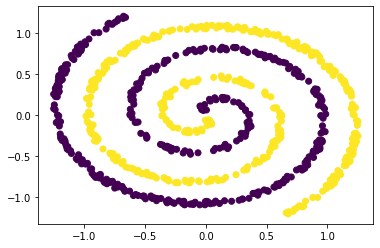

In [4]:
%matplotlib inline
x1, x2 = xx[:,0], xx[:,1]
plt.scatter(x1, x2, c=y)

In [69]:
optimizer = tnn.Adam(0.01)
net = tnn.AutoForm(new_layers=True)
la1 = tnn.NonLinearLayer(2, 4, activation=tnn.Relu(), optimizer=optimizer)
la2 = tnn.NonLinearLayer(4, 4, activation=tnn.Relu(), optimizer=optimizer)
la3 = tnn.NonLinearLayer(4, 1, activation=tnn.Sigmoid(), optimizer=optimizer)

In [70]:
%matplotlib tk

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

for epoch in range(100000):
    yout = net.forward(xx)
    dy = yout - yy
    dx = net.backward(dy)
    
    net.update()
    
    if epoch%100 == 0:
        error = tnn.CrossEntropyBinary().loss(yout, yy)
        print(epoch, 'Error = ', error)
        ax.clear()
        
        out = (yout>0.5).reshape(-1)
        ax.scatter(x1, x2, c=out)
        
        fig.canvas.draw()
        plt.pause(0.01)
        print("\n")
        if error < 0.00025:
            print('fitted to our expectation')
            break

0 Error =  0.7005383464543544


100 Error =  0.6277526217547874


200 Error =  0.5649156382608211


300 Error =  0.5081055634939858


400 Error =  0.4497059641925827


500 Error =  0.4356451227034093


600 Error =  0.42830997733212867


700 Error =  0.4201795025301038


800 Error =  0.4159153590934595


900 Error =  0.41320510772755215


1000 Error =  0.4113159340543119


1100 Error =  0.4100190081633845


1200 Error =  0.4087112690429286


1300 Error =  0.40842294209340596


1400 Error =  0.4068802366299278


1500 Error =  0.4065184587336125


1600 Error =  0.40584664513335156


1700 Error =  0.405414693086937


1800 Error =  0.40480262791996835


1900 Error =  0.40410873267420067


2000 Error =  0.4037755701839967


2100 Error =  0.4033892720570064


2200 Error =  0.4030847079174802


2300 Error =  0.4028805882942876


2400 Error =  0.4025427513145147


2500 Error =  0.40238824658756756


2600 Error =  0.4023007255611042


2700 Error =  0.4024991724001192


2800 Error =  0.4023787400

TclError: invalid command name "pyimage102"

### Computing the significance of each neuron

In [71]:
def compute_norm_of_neurons(in_layer, out_layer, order=2):
    innorm = np.linalg.norm(in_layer.weights, ord=order, axis=0)
    outnorm = np.linalg.norm(out_layer.weights, ord=order, axis=1)
    return innorm*outnorm

In [75]:
## layer1
compute_norm_of_neurons(la1, la2)

array([18.64677702, 15.91057446, 46.60867393, 25.09892863])

In [76]:
compute_norm_of_neurons(la2, la3)

array([1.80200244e-124, 1.57150175e+002, 6.86431529e+000, 6.76067006e+001])

In [52]:
## Retraining the network, removing the least significant neuron

In [77]:
%matplotlib tk

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

for epoch in range(100000):
#     la2.weights[2,:] *= 0.
#     la3.weights[0, :] *= 0.    
    
    yout = net.forward(xx)
    dy = yout - yy
    dx = net.backward(dy)
    
    net.update()
    
    if epoch%100 == 0:
        error = tnn.CrossEntropyBinary().loss(yout, yy)
        print(epoch, 'Error = ', error)
        ax.clear()
        
        out = (yout>0.5).reshape(-1)
        ax.scatter(x1, x2, c=out)
        
        fig.canvas.draw()
        plt.pause(0.01)
        print("\n")
        if error < 0.00025:
            print('fitted to our expectation')
            break

0 Error =  0.40060316023178244


100 Error =  0.4005672671238569


200 Error =  0.400526926515401


300 Error =  0.4002935781366641


400 Error =  0.40030510307582895


500 Error =  0.40033629550853506


600 Error =  0.40014807326865165


700 Error =  0.39980069514456895


800 Error =  0.3998143496656282


900 Error =  0.3998317354448318


1000 Error =  0.3996601257366668


1100 Error =  0.3998629214019265


1200 Error =  0.3998479076832021


1300 Error =  0.40048774989036945


1400 Error =  0.4002877101395154


1500 Error =  0.39972045776917264


1600 Error =  0.39952895448069703


1700 Error =  0.40024636040662415


1800 Error =  0.39930251003377293


1900 Error =  0.39968151258496576


2000 Error =  0.3992558551627724


2100 Error =  0.39971579402584867


2200 Error =  0.39980958225024815


2300 Error =  0.399289168629191


2400 Error =  0.3990514970468297


2500 Error =  0.39885017781930393


2600 Error =  0.39894885889816495


2700 Error =  0.39922591984345174


2800 Error =  0.39

TclError: invalid command name "pyimage124"